# 프로젝트 #1 : 손수 설계하는 선형회귀, 당뇨병 수치를 맞춰보자!

**▷▶ 필요한 패키지 import하기**


In [1]:
import numpy as np               # numpy 불러오기
import pandas as pd              # pandas 불러오기
import matplotlib.pyplot as plt  # 데이터 시각화 라이브러리
# import seaborn as sns            # 데이터 시각화 라이브러리

from sklearn.model_selection import train_test_split  # model_selection 모듈 안의 Train / Test Set을 나누기 위한 함수 불러오기
from sklearn.metrics import classification_report  # metrics 모듈 안의 학습 모델을 평가하기 위한 함수 불러오기
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


---

### (1) 데이터 가져오기

<br>

> - **`sklearn.datasets`**의 **`load_diabetes`**에서 데이터를 로딩한다. <br><br>
> - **`diabets`**의 **`data`**를 **`df_x`**에, **`target`**을 **`df_y`**에 저장한다.

In [2]:
from sklearn.datasets import load_diabetes # 실습파일 불러오기

diabetes = load_diabetes(as_frame = False) # load_diabetes 매서드를 사용해서 diabetes 데이터 불러옴

<br>

- `diabetes.keys()` 매서드를 사용해서 `diabetes` 객체 안의 정보를 확인해보자


- `diabetes` 안에는 10개의 정보들이 담겨있는 것을 확인할 수 있다.

In [3]:
print(diabetes.keys())

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])


**< diabetes가 가지는 키(속성)의 종류 >**

- data : (442, 10) 크기의 ndarray,입력값
- target : (442, ) 크기의 ndarray, 타깃
- feature_names : data의 각 열의 특징 이름
- frame : (442,11) 크기의 데이터 프레임(호출 시 인자로 받은 as_frame=True일때만 접근가능)
- DESCR : 데이터셋의 설명
- data_filename : data의 위치경로
- target_filename : target의 위치경로
- (data, target) : 입력값과 타깃 튜플(return_X_y=True일 때만 접근 가능)

<br>

\>> diabetes의 데이터를 파악하기 위해 pandas 모듈의 DataFrame을 활용해보자


- **diabetes**의 **data**는 **10개의 feature**가 존재하며 데이터의 **결측치는 존재하지 않음**


- **diabetes**의 **data**는 모든값이 **수치형 데이터**이다.

In [4]:
df = pd.DataFrame(data=diabetes.data, columns = diabetes.feature_names)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
dtypes: float64(10)
memory usage: 34.7 KB


In [5]:
print(df.max())
print()
print(df.min())

print('\n===========\n')

print(diabetes.target.max())
print(diabetes.target.min())


age    0.110727
sex    0.050680
bmi    0.170555
bp     0.132044
s1     0.153914
s2     0.198788
s3     0.181179
s4     0.185234
s5     0.133599
s6     0.135612
dtype: float64

age   -0.107226
sex   -0.044642
bmi   -0.090275
bp    -0.112400
s1    -0.126781
s2    -0.115613
s3    -0.102307
s4    -0.076395
s5    -0.126097
s6    -0.137767
dtype: float64


346.0
25.0


※ 위 data 및 target 값의 분포를 보게되면... <br>
- data(x)은 범위가 -0.2 <x <0.2을 가지게 되며
- target(y)는 범위가  25 <y <346을 가지게 된다.

<br>

**이는 Loss값이 크게 나오도록 기인하기 때문에 <br>
정규화(Normalization)를 통해 값의 단위를 맞춰주는 작업을 수행한다.**


In [6]:
# data와 target 받아와서 df_x / df_y 변수에 저장

df_x = diabetes.data         
df_y = diabetes.target/346   # 정규화 수행(346으로 나눔) 

print(df_x.shape); print(df_y.shape)

(442, 10)
(442,)


-----
<br>

### (2)(3) 모델에 입력/예측할 데이터 `X`, `y` 준비하기



In [7]:
X = df_x.copy()  
y = df_y.copy()  

print(type(X)); print(type(y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


-----
<br>

### (4) train 데이터와 test 데이터로 분리하기

- `X`와 `y` 데이터를 각각 train 데이터와 test데이터로 8:2 비율로 고르게 나뉘도록 분리<br><br>
    - train 데이터 샘플 수 : 353개
    - test  데이터 샘플 수 : 89개

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(353, 10) (353,)
(89, 10) (89,)


-----
<br>

### (5) 모델 준비하기
<br>

- 입력 데이터 개수에 맞는 파라미터 `W`와 `b` 설정


- 입력 데이터의 feature 수가 10개이므로 W는 10개의 벡터, b는 1개의 값으로 초기값 설정

In [9]:
W_init = np.random.rand(10) # 모델의 초기값(파라미터)는 numpy의 random 모듈을 통해 설정
b_init = np.random.rand()


<br>

**<모델 함수 구현>**


- 여기서, `W`는 10x1 벡터 `b`는 1개의 값이므로 수식을 쓰게 되면...


- `y_pred = w1x1 + w2x2 + ... + w10x10 + b`

In [10]:
# 다변수 일차함수 모델링

def model(X, W, b):
    predictions = 0   # 모델을 통한 예측값 변수 초기값 설정
    for i in range(len(X[0,:])):  # for 반복문을 통해 10번 반복 계산
        predictions += X[:,i]*W[i]
    predictions += b
    return predictions

-----
<br>

### (6) 손실함수 `loss` 정의하기
<br>

- 손실함수는 Mean Squared Error 지표를 사용한다.

In [11]:
# MSE 함수

def MSE(a, b):
    mse = ((a-b)**2).mean() # 두 값의 차이의 제곱의 평균
    return mse

In [12]:
# Loss Function 다시 새로 짜보자

def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L

-----
<br>

### (7) 기울기를 구하는 `gradient` 함수 구현하기
<br>

- 학습률, learning rate는 보통 `0.0001` ~ `0.01` 정도의 작은 값으로 사용

In [13]:
def gradient(X,W,b,y):
    # N은 X 데이터 의 개수
    N = len(X)
    
    # y_pred 준비
    y_pred = model(X,W,b)
    
    # 공식에 맞게 gradient 계산
    dW = 1/N*2*X.T.dot(y_pred-y)
    
    # b의 gradient 계산
    db = 2*(y_pred-y).mean()
    return dW, db

-----
<br>

### (8) 하이퍼 파라미터인 학습률 설정하기
<br>

- 학습률, learning rate는 보통 `0.0001` ~ `0.01` 정도의 작은 값으로 사용

In [14]:
LEARNING_RATE = [0.0001, 0.001, 0.01]  
# 최적의 learning rate를 찾기위해 3가지 값 설정

<br>

### (9) 모델 학습하기


In [15]:
# 손실함수 파라미터 학습

epoch = 10000 # 반복학습 갯수 설정

losses= np.zeros(shape=(len(LEARNING_RATE), epoch))   
# 손실함수 값을 누적하기 위해 0으로 채워진 3x1500 행렬 설정

W_fin = np.zeros(shape=(3,10))
b_fin = np.zeros(shape=(3,1))

for i, learning_rate in enumerate(LEARNING_RATE):
    print(f'===== {i+1}번째 시도 >> LEARNINGRATE = {learning_rate} =====')
    W = W_init
    b = b_init
    for j in range(epoch):
        dW, db = gradient(X_train, W, b, y_train)
        W -= learning_rate*dW
        b -= learning_rate*db
        
        W_fin[i,:] = W
        b_fin[i,:] = b
        
        L = loss(X_train, W, b, y_train)
        #losses.append(L)
        losses[i, j] = L
        if (j+1)%100==0:
            print('Iteration %d : Loss %.4f' %(j+1, L))
    print()

===== 1번째 시도 >> LEARNINGRATE = 0.0001 =====
Iteration 100 : Loss 0.0929
Iteration 200 : Loss 0.0913
Iteration 300 : Loss 0.0897
Iteration 400 : Loss 0.0883
Iteration 500 : Loss 0.0868
Iteration 600 : Loss 0.0855
Iteration 700 : Loss 0.0842
Iteration 800 : Loss 0.0829
Iteration 900 : Loss 0.0817
Iteration 1000 : Loss 0.0805
Iteration 1100 : Loss 0.0794
Iteration 1200 : Loss 0.0783
Iteration 1300 : Loss 0.0773
Iteration 1400 : Loss 0.0763
Iteration 1500 : Loss 0.0753
Iteration 1600 : Loss 0.0744
Iteration 1700 : Loss 0.0735
Iteration 1800 : Loss 0.0727
Iteration 1900 : Loss 0.0719
Iteration 2000 : Loss 0.0711
Iteration 2100 : Loss 0.0703
Iteration 2200 : Loss 0.0696
Iteration 2300 : Loss 0.0689
Iteration 2400 : Loss 0.0683
Iteration 2500 : Loss 0.0676
Iteration 2600 : Loss 0.0670
Iteration 2700 : Loss 0.0664
Iteration 2800 : Loss 0.0659
Iteration 2900 : Loss 0.0653
Iteration 3000 : Loss 0.0648
Iteration 3100 : Loss 0.0643
Iteration 3200 : Loss 0.0638
Iteration 3300 : Loss 0.0633
Iteratio

Iteration 8300 : Loss 0.0346
Iteration 8400 : Loss 0.0345
Iteration 8500 : Loss 0.0344
Iteration 8600 : Loss 0.0343
Iteration 8700 : Loss 0.0342
Iteration 8800 : Loss 0.0341
Iteration 8900 : Loss 0.0340
Iteration 9000 : Loss 0.0339
Iteration 9100 : Loss 0.0338
Iteration 9200 : Loss 0.0337
Iteration 9300 : Loss 0.0336
Iteration 9400 : Loss 0.0336
Iteration 9500 : Loss 0.0335
Iteration 9600 : Loss 0.0334
Iteration 9700 : Loss 0.0333
Iteration 9800 : Loss 0.0332
Iteration 9900 : Loss 0.0331
Iteration 10000 : Loss 0.0330



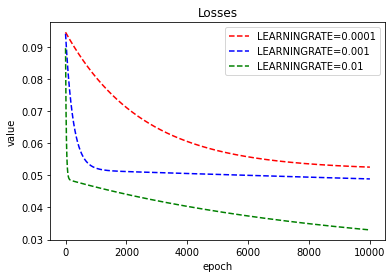

In [16]:
plt.plot(losses[0,:],'r--', label='LEARNINGRATE=0.0001')
plt.plot(losses[1,:],'b--', label='LEARNINGRATE=0.001')
plt.plot(losses[2,:],'g--', label='LEARNINGRATE=0.01')
plt.legend()
plt.title('Losses')
plt.xlabel('epoch')
plt.ylabel('value')

plt.show()

<br>

### (10) test 데이터에 대한 성능 확인하기


In [17]:
mse = []
prediction = np.zeros(shape=(len(LEARNING_RATE), len(X_test)))

for i in range(len(LEARNING_RATE)):  # 3번 반복
    pred = model(X_test, W_fin[i,:], b_fin[i,:])
    prediction[i,:] = pred
    
    PI = loss(X_test, W_fin[i,:], b_fin[i,:], y_test)
    mse.append(PI)
print(f'LEARNINGRATE = 0.0001일때, MSE = {mse[0]}')
print(f'LEARNINGRATE = 0.0001일때, MSE = {mse[1]}')
print(f'LEARNINGRATE = 0.0001일때, MSE = {mse[2]}')

LEARNINGRATE = 0.0001일때, MSE = 0.04453570250964284
LEARNINGRATE = 0.0001일때, MSE = 0.042005236929265416
LEARNINGRATE = 0.0001일때, MSE = 0.0292925400747334


<br>

### (11) 정답 데이터와 예측한 데이터 시각화하기


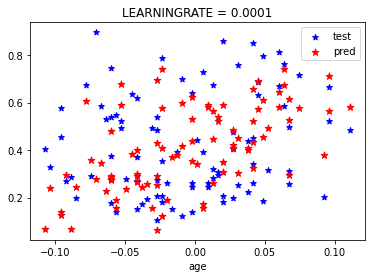

In [18]:
plt.scatter(X_test[:, 0], y_test, color='blue', marker = '*', label='test')
plt.scatter(X_test[:, 0], prediction[0,:], color='red', marker = '*', s=50, label='pred')
# plt.scatter(X_test[:, 0], y_test, label='test')
# plt.scatter(X_test[:, 0], prediction[0,:], label='pred')
plt.legend()
plt.title('LEARNINGRATE = 0.0001')
plt.xlabel('age')

plt.show()

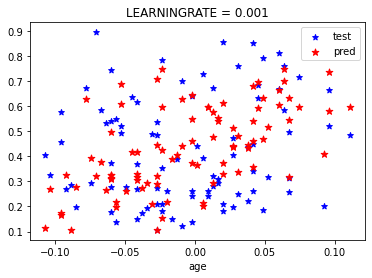

In [19]:
plt.scatter(X_test[:, 0], y_test, color='blue', marker = '*', label='test')
plt.scatter(X_test[:, 0], prediction[1,:], color='red', marker = '*', s=50, label='pred')
plt.legend()
plt.title('LEARNINGRATE = 0.001')
plt.xlabel('age')

plt.show()

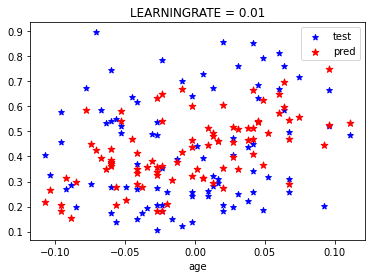

In [20]:
plt.scatter(X_test[:, 0], y_test, color='blue', marker = '*', label='test')
plt.scatter(X_test[:, 0], prediction[2,:], color='red', marker = '*', s=50, label='pred')
plt.legend()
plt.title('LEARNINGRATE = 0.01')
plt.xlabel('age')

plt.show()

<br>

### (12) 결론


- `프로젝트(1) : 손수 설계하는 선형회귀, 당뇨병 수치를 맞춰보자!`에서는 442개의 Sample 및 10개의 특성값(feature)를 통해 당뇨병(연속적인실수값) 수치를 맞춰보는 선형회귀 문제라 할 수 있다.


- 데이터는 Scikit-Learn dataset에서 가져왔고, pandas DataFrame으로 데이터의 속성을 파악했다. <br>
    - 데이터에는 결측치가 존재하지 않았고, 모든 값이 수치형 데이터이다.
    - 또한, 중요한 점으로 data(x)의 값은 범위가 -0.2 < x <0.2, target(y)은 범위가 25< y < 346을 가지게 되며, 이는 loss값이 크게 나오도록 기인하기 때문에 정규화(Normalization)를 통해 값의 단위를 맞춰주는 작업을 수행하였다.<br>
    
    ![image](https://user-images.githubusercontent.com/103712369/166303467-bd7a8a9f-c3a2-4657-b894-923fa0f49ef9.png)
    
<br>

- 하이퍼파라미터인 LEARNINGRATE는 앞선 노드에서 보통 `0.001` ~ `0.01` 값으로 설정한다고 했기때문에, 총 3개의 범위로 나누어 가장 성능이 좋은 0.01을 채택하였다.
    - <U>**MSE 손실함수는 0.026640838895731708 값**이 나온것을 확인할 수 있다.<U>


- 학습은 Loss값이 충분히 떨어질 때까지 학습을 진행하기위해 총 10,000번으로 반복하여 수행하였다.

![image](https://user-images.githubusercontent.com/103712369/166304112-b42b627e-6a3e-4d37-8f3e-1ef95638aa6e.png)